<a href="https://colab.research.google.com/github/hany019/A1/blob/main/Task6_ELECTRE_I_jobs_choice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 6.1: ELECTRE for choice problems

This notebook is prepared to practise with the model of outranking in MCDA. The method used is ELECTRE-I for choice (based on kernel). Deliver the report in the virtual campus.

In order to draw some of the plots, the MCDA library needs [Graphviz](https://graphviz.org/) to be available in your system.

In Google Colab, Graphviz is already installed and there is no need to install it manually.

However, if you prefer to work with other environments:

In Linux systems, you can easily [install](https://graphviz.org/download/#linux) it using the APT or YUM package managers:
1. APT: `sudo apt install graphviz`
2. YUM: `sudo yum install graphviz`

In MAC, you can [install](https://graphviz.org/download/#mac) it through Homebrew or MacPorts:
1. Homebrew: `brew install graphviz`
2. MacPorts: `sudo port install graphviz`

On Windows, you can install the [provided EXE file](https://graphviz.org/download/#windows) or install it using the Windows Package Manager: `winget install graphviz`.
In either case, the system PATH must be modified to include the Graphviz directory (For instance `C:\Program Files\Graphviz\bin\`). Once it has been modified, the Anaconda environment must be restarted to properly load the PATH modification.



In [9]:
!pip install mcda==0.4.1


In [10]:
from mcda.core.performance_table import *
from mcda.core.scales import *
from mcda.plot import *
from mcda.core.matrices import AdjacencyMatrix
from mcda.outranking.electre import *

The exercise is about a person that has studied computer science and is searching for a job. The goal is to make a ranking a set of jobs using 5 criteria: Salary, Company, Internationalization, Duration and Topic of the job.

The jobs offers are:


*   Id0: JAVA- Java programmer in AAA
*   Id1 : DATA - Data analyist in BBB
*   Id2 : SECUR - Computer security in CCC
*   Id3 : MANAG - Project manager in DDD
*   Id4 : ML - Machine learning in EEE
*   Id5 : USER - User assistance in FFF

Q1. Data is defined below. Weights indicate the relative importance of each criterion in the concordance calculation. What can you say about the weights?


In this implementation, it is required to define the scale of each criterion. There are quantitative (numerical) and qualitative (categorical) scales. This example uses only quantitative values. For each scale you must indicate the minimum possible value, the maximum one and the preference direction (MAX or MIN). A vector with the scales is needed as parameter in the ELECTRE functions.


In [11]:
scales = {
    "Salary": QuantitativeScale(1000, 3000, PreferenceDirection.MAX),
    "Company": QuantitativeScale(1, 10, PreferenceDirection.MAX),
    "Internationalization": QuantitativeScale(1, 3, PreferenceDirection.MAX),
    "Duration": QuantitativeScale(3, 30, PreferenceDirection.MAX),
    "Topic": QuantitativeScale(1, 10, PreferenceDirection.MAX)
}

In [12]:
alternatives = ["0.JAVA", "1.DATA", "2.SECUR", "3.MANAG", "4.ML", "5.USER"]
criteria = {
    "Salary": 0.3,
    "Company": 0.2,
    "Internationalization": 0.1,
    "Duration": 0.2,
    "Topic": 0.2
    }

performance_table = PerformanceTable(
                    [[1600.0, 8, 2, 8.0, 3],
                     [2100.0, 3, 1, 12.0, 6],
                     [2400.0, 7, 3, 14.0, 7],
                     [2700.0, 6, 2, 24.0, 3],
                     [1700.0, 4, 2, 10.0, 9],
                     [1100.0, 7, 1, 22.0, 1]],
                     alternatives = alternatives,
                     criteria = criteria,
                     scales = scales)

performance_table.df

,Salary,Company,Internationalization,Duration,Topic
0.JAVA,1600.0,8,2,8.0,3
1.DATA,2100.0,3,1,12.0,6
2.SECUR,2400.0,7,3,14.0,7
3.MANAG,2700.0,6,2,24.0,3
4.ML,1700.0,4,2,10.0,9
5.USER,1100.0,7,1,22.0,1


**Q1. Analysis of Weights in the ELECTRE-I Method**

The distribution of weights in the ELECTRE-I method plays a crucial role in evaluating job offers based on multiple criteria. The provided performance table for each job alternative shows varying values across criteria such as Salary, Company, Internationalization, Duration, and Topic. Here's the breakdown and implications of each weight:

**Salary (30%):** The highest weight suggests that financial compensation is the primary consideration among the criteria. This reflects the practical emphasis on remuneration as a decisive factor, particularly evident in the job offer for "MANAG" which has the highest salary at 2700.

**Company (20%):** This significant weight underlines the importance of the employer's reputation and stability. Notably, "JAVA" scores the highest in this criterion with a rating of 8, making it an attractive option if company prestige is prioritized.

**Duration (20%):** Long-term employment is equally valued as the company's reputation, highlighting a preference for job stability. "MANAG" offers the longest duration of 24 months, appealing to those seeking longer tenure.

**Topic (20%):** The job's subject area or sector also holds substantial weight, suggesting that the nature of the work is critical. "ML" scores the highest in this criterion with a rating of 9, indicating its significance for candidates interested in machine learning.

**Internationalization (10%):** The lowest weight indicates that international exposure or opportunities are less critical but still considered. "SECUR" and "MANAG" both score highest in this area, which might appeal to candidates looking for global engagement.

**Overall,** the weights reflect a comprehensive approach to decision-making, where financial benefits are most critical but balanced with substantial consideration of professional growth, job stability, and work content. This prioritization aligns with common career goals among professionals, especially in competitive job markets.







Q2. The ELECTRE-1 uses binary concordance for each criterion and then applies the weights.
Reproduce manually the concordance between SECUR and MANAG.

Based on the concordance matrix and the ELECTRE-I method:

**Performance for "SECUR" and "MANAG":**
- **SECUR**: [2400.0, 7, 3, 14.0, 7]
- **MANAG**: [2700.0, 6, 2, 24.0, 3]

Given the weights:
- Salary: 0.3
- Company: 0.2
- Internationalization: 0.1
- Duration: 0.2
- Topic: 0.2

**Binary Concordance Calculation:**
For each criterion, we determine if SECUR is at least as good as MANAG. If so, the weight of that criterion contributes to the concordance index between SECUR and MANAG.

1. **Salary**: SECUR has 2400 compared to MANAG's 2700. Since SECUR's salary is less, it does not contribute to the concordance (0 weight).
2. **Company**: SECUR scores a 7 compared to MANAG's 6. SECUR is equal or better, so the weight for Company (0.2) is included.
3. **Internationalization**: Both have the maximum score of 3. Since they are equal, Internationalization's weight (0.1) is included.
4. **Duration**: SECUR's duration is 14 compared to MANAG's 24. Since SECUR is less, it does not contribute to the concordance (0 weight).
5. **Topic**: SECUR scores a 7 compared to MANAG's 3. SECUR is equal or better, so the weight for Topic (0.2) is included.

**Total Concordance Score Calculation:**
The total concordance index is the sum of the weights where SECUR is at least as good as MANAG:
- \( 0 (Salary) + 0.2 (Company) + 0.1 (Internationalization) + 0 (Duration) + 0.2 (Topic) = 0.5 \)

Thus, the concordance index between SECUR and MANAG is 0.5 based on the weights of the criteria where SECUR is at least as good as or better than MANAG.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0.JAVA,1.DATA,2.SECUR,3.MANAG,4.ML,5.USER
0.JAVA,1.0,0.3,0.2,0.5,0.3,0.8
1.DATA,0.7,1.0,0.0,0.2,0.5,0.6
2.SECUR,0.8,1.0,1.0,0.5,0.8,0.8
3.MANAG,0.8,0.8,0.5,1.0,0.8,0.8
4.ML,0.8,0.5,0.2,0.3,1.0,0.6
5.USER,0.2,0.5,0.4,0.2,0.4,1.0


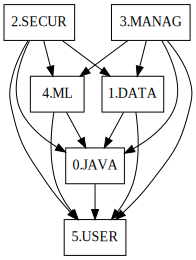

In [13]:
electre1 = Electre1(criteria_weights=criteria, c_hat=0.6, d_hat=0.4)
concordance_matrix = electre1.concordance(performance_table)

display(concordance_matrix)

#Now we plot the graph of concordance with relations above the cut threshold
cut_threshold = 0.6
conc_mat_cut = concordance_matrix.where(concordance_matrix >= cut_threshold, other=0)
AdjacencyMatrix(conc_mat_cut).plot()



Q3. After the concordance, the method calculates the discordance in a boolean way too. In this implementation, the discordance is calculated as a proportion of the maximum difference between two values on each criterion. A negative value means no discordance at all. Find a case with maximum discordance and explain why it happens.



In [14]:
discordance_matrix = electre1.discordance(performance_table)
discordance_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0.JAVA,1.DATA,2.SECUR,3.MANAG,4.ML,5.USER
0.JAVA,0.000000,0.312500,0.5000,0.6875,0.062500,0.008750
1.DATA,0.003125,0.000000,0.1875,0.3750,0.001875,0.006250
2.SECUR,0.000625,-0.000625,0.0000,0.1875,0.001250,0.005000
3.MANAG,0.001250,0.001875,0.0025,0.0000,0.003750,0.000625
4.ML,0.002500,0.250000,0.4375,0.6250,0.000000,0.007500
5.USER,0.312500,0.625000,0.8125,1.0000,0.375000,0.000000


**Next**. The credibility step merges concordance with discordance using two thresholds. It is one if concordance is >= c_hat and discordance is <=d_hat.



In [20]:
credibility_matrix = electre1.construct(performance_table)
credibility_matrix.df

,0.JAVA,1.DATA,2.SECUR,3.MANAG,4.ML,5.USER
0.JAVA,1.0,0.0,0.0,0.0,0.0,1
1.DATA,1.0,1.0,0.0,0.0,0.0,1
2.SECUR,1.0,1.0,1.0,0.0,1.0,1
3.MANAG,1.0,1.0,0.0,1.0,1.0,1
4.ML,1.0,0.0,0.0,0.0,1.0,1
5.USER,0.0,0.0,0.0,0.0,0.0,1


**(Q3)Analyzing** the discordance matrix provided for the ELECTRE-I method, the maximum discordance value of 1.0 is observed between the job offers "USER" and "MANAG". This value indicates a complete discordance where "USER" significantly underperforms compared to "MANAG" on at least one criterion. This could be due to a large difference in the most important criterion, such as "Salary", where "MANAG" has a higher value contributing to its preferability over "USER". This significant discordance suggests that "USER" may be lacking in a key area that is highly valued, which could veto its selection over "MANAG" in the decision-making process.

In [18]:
kernel = electre1.exploit(credibility_matrix)
kernel


['3.MANAG', '2.SECUR']

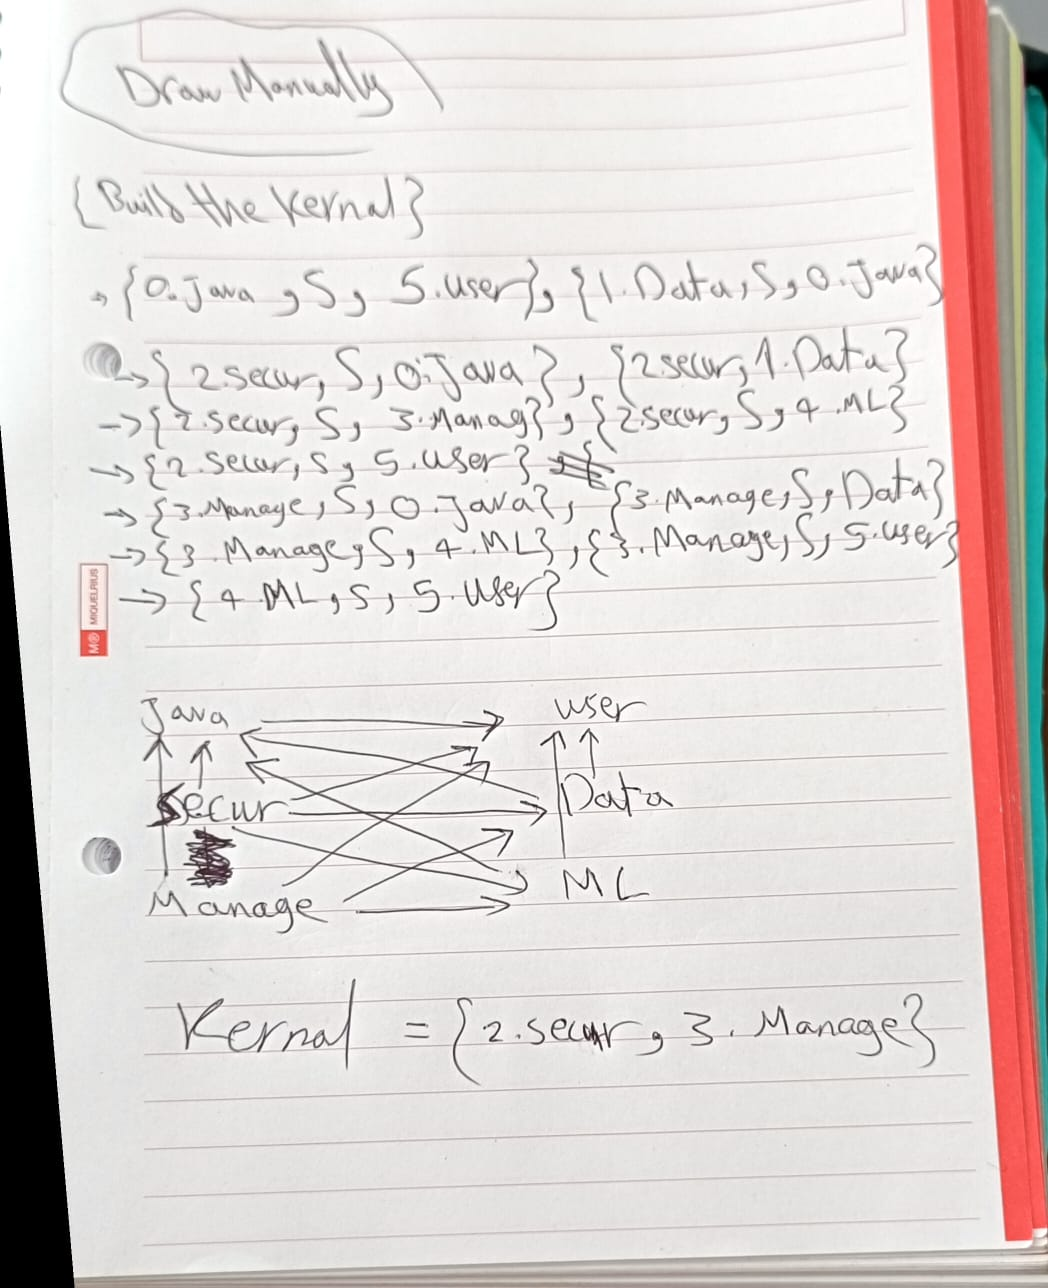



**The kernel is determined by looking for nodes that have no incoming edges (i.e., no other node outranks them). Upon a closer examination of the matrix:**


2.SECUR does not outrank 3.MANAG and vice versa, so there are no edges between these two nodes. However, 2.SECUR has no other job outranking it (no incoming edges).

3.MANAG also does not have any job outranking it, as it either outranks or is not outranked by 2.SECUR, and there are no other jobs with a score of 1.0 against it.

Considering the credibility matrix, 2.SECUR and 3.MANAG would be the only nodes without any incoming edges. This implies that both 2.SECUR and 3.MANAG form the kernel.


Therefore, you are correct; the kernel for this ELECTRE-I problem based on the provided credibility matrix should be {2.SECUR, 3.MANAG}.
